In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
type(mnist.train.images)

numpy.ndarray

In [11]:
mnist.train.images.shape

(55000, 784)

In [12]:
mnist.train.images[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
mnist.train.images[2].shape

(784,)

In [14]:
28*28

784

In [24]:
sample = mnist.train.images[2034].reshape(28, 28)

In [17]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

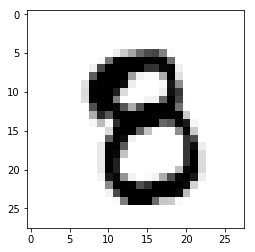

In [25]:
plt.imshow(sample, cmap='Greys')

In [26]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [27]:
n_classes = 10
n_samples = mnist.train.num_examples

In [28]:
mnist.train.num_examples

55000

In [29]:
n_input = 784

In [30]:
n_hidden_1 = 256
n_hidden_2 = 256

In [44]:
def multilayer_perceptron(x, weights, biases):
    '''
    
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    # First Hidden layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Func(X * W + B) = RELU -> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [32]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [33]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [36]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [37]:
x = tf.placeholder('float', [None, n_input])

In [38]:
y = tf.placeholder('float', [None, n_classes])

In [45]:
pred = multilayer_perceptron(x, weights, biases)

In [47]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

TRAINING THE MODEL

In [60]:
t = mnist.train.next_batch(batch_size=batch_size)

In [55]:
Xsamp, ysamp = t


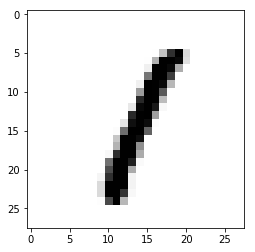

In [58]:
plt.imshow(Xsamp.reshape(28, 28), cmap='Greys')

In [59]:
ysamp

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [61]:
# # Run the Session

In [62]:
sess = tf.InteractiveSession()

In [63]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [64]:
sess.run(init)

In [70]:
# 15 loops
for epoch in range(training_epochs):
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost: {:.4f}".format(epoch+1, avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost: 0.1564
Epoch: 2 cost: 0.2173
Epoch: 3 cost: 0.1383
Epoch: 4 cost: 0.1595
Epoch: 5 cost: 0.1373
Epoch: 6 cost: 0.1833
Epoch: 7 cost: 0.1754
Epoch: 8 cost: 0.1086
Epoch: 9 cost: 0.1600
Epoch: 10 cost: 0.1642
Epoch: 11 cost: 0.1680
Epoch: 12 cost: 0.1120
Epoch: 13 cost: 0.1626
Epoch: 14 cost: 0.1100
Epoch: 15 cost: 0.1044
Model has completed 15 Epochs of training


In [71]:
## Model Evaluations

In [72]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [75]:
correct_predictions = tf.cast(correct_predictions,  'float')

In [76]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [77]:
accuracy = tf.reduce_mean(correct_predictions)

In [78]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [80]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [81]:
mnist.test.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [82]:
accuracy.eval({x: mnist.test.images, y:mnist.test.labels})

0.9625